In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() # seaborn 속성을 기본값으로 설정

데이터 준비

[01]  CRIM자치시(town) 별 1인당 범죄율
[02]  ZN	25,000 평방피트를 초과하는 거주지역의 비율
[03]  INDUS	비소매상업지역이 점유하고 있는 토지의 비율
[04]  CHAS	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
[05]  NOX	10ppm 당 농축 일산화질소
[06]  RM	주택 1가구당 평균 방의 개수
[07]  AGE	1940년 이전에 건축된 소유주택의 비율
[08]  DIS	5개의 보스턴 직업센터까지의 접근성 지수
[09]  RAD	방사형 도로까지의 접근성 지수
[10]  TAX	10,000 달러 당 재산세율
[11]  PTRATIO	자치시(town)별 학생/교사 비율
[12]  B	1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
[13]  LSTAT	모집단의 하위계층의 비율(%)
[14]  MEDV	본인 소유의 주택가격(중앙값) (단위: $1,000)


In [12]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

class Cols:
    crim = "crim"
    zn = "zn"
    indus='indus'
    chas = 'chas'
    nox = 'nox'
    rm = 'rm'
    age = 'age'
    dis = 'dis'
    rad = 'rad'
    tax = 'tax'
    ptratio = 'ptratio'
    black = 'black'
    lstat = 'lstat'
    medv = 'medv'
    


In [13]:
print(train.shape[0])
train.head()

333


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


분석을 위해 train/test를 합친다.
train의 갯수를 저장해 둔다.(나중에 분리해야 하므로)

In [14]:
train_len = train.shape[0]

merged = train.append(test, ignore_index=True, sort=False) 
print("merged len : ", merged.shape[0])

merged len :  506


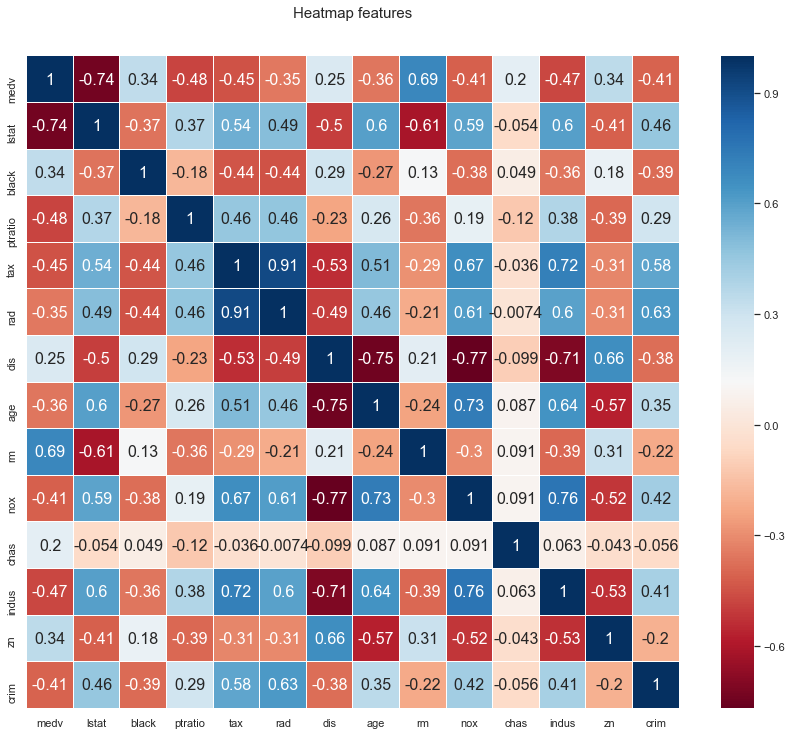

In [17]:
heatmap_data = merged[[Cols.medv, Cols.lstat, Cols.black, Cols.ptratio, Cols.tax, Cols.rad, Cols.dis, Cols.age, Cols.rm, Cols.nox, Cols.chas, Cols.indus, Cols.zn, Cols.crim]]

colormap = plt.cm.RdBu
plt.figure(figsize=(15,12))
plt.title('Heatmap features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})
